## 1. Content Based Filtering

In [1]:
import pandas as pd
import numpy as np
from numpy import mean
from numpy import std
from nltk.corpus import stopwords
import string
import math
import pickle
import joblib
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import BaggingClassifier
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors
from fuzzywuzzy import fuzz
from surprise import Dataset, Reader
from surprise import SVD
from surprise import accuracy
from surprise.model_selection import cross_validate 
from surprise.model_selection import train_test_split as tts
from surprise.model_selection import RandomizedSearchCV
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [28]:
productsDF = pd.read_excel("product_data.xlsx")
productsDF['combined_features'] = productsDF.brand + ' ' + productsDF.category + ' ' + productsDF.ingredients
productsDF.drop(columns=['product_url', 'image_url'], axis=1, inplace=True)
productsDF.head(10)

product_id                                       product_name     category  \
0         315  The Ordinary Natural Moisturising Factors + HA...  Moisturizer   
1         316      CeraVe Facial Moisturising Lotion SPF 25 52ml  Moisturizer   
2         317  The Ordinary Hyaluronic Acid 2% + B5 Hydration...  Moisturizer   
3         319                     CeraVe Moisturising Cream 454g  Moisturizer   
4         320                   CeraVe Moisturising Lotion 473ml  Moisturizer   
5         321      CeraVe Facial Moisturising Lotion No SPF 52ml  Moisturizer   
6         325                     CeraVe Moisturising Cream 50ml  Moisturizer   
7         326                     CeraVe Moisturising Cream 340g  Moisturizer   
8         322  The Ordinary Natural Moisturizing Factors + HA...  Moisturizer   
9         323                       CeraVe Smoothing Cream 177ml  Moisturizer   

                                         ingredients  price         brand  \
0  capric triglyceride, cetyl alcohol, propanedio...    5.2  The Ordinary   
1  homosalate, glycerin, octocrylene, ethylhexyl,...   13.0        CeraVe   
2  sodium hyaluronate, sodium hyaluronate, panthe...    6.2  The Ordinary   
3  glycerin, cetearyl alcohol, capric triglycerid...   16.0        CeraVe   
4  glycerin, capric triglyceride, cetearyl alcoho...   15.0        CeraVe   
5  glycerin, capric triglyceride, niacinamide, ce...   13.0        CeraVe   
6  glycerin, cetearyl alcohol, capric triglycerid...    4.0        CeraVe   
7  glycerin, cetearyl alcohol, capric triglycerid...   13.0        CeraVe   
8  capric triglyceride, cetyl alcohol, propanedio...    6.8  The Ordinary   
9  glycerin, behentrimonium methosulfate, ceteary...   12.0        CeraVe   

   Rating  good_reviews  bad_reviews  \
0       4             7            2   
1       4             9            0   
2       4             9            0   
3       4             8            1   
4       4             9            0   
5       4             9            0   
6       4             9            0   
7       4             8            1   
8       4             9            0   
9       4             8            1   

                                         description  \
0  Effectively hydrate skin with The Ordinary Nat...   
1                            Protect your skin with    
2   Recharge and rehydrate your complexion with the    
3  Envelope your skin in the replenishing powers ...   
4              Quench dry, dehydrated skin with the    
5                          Quench thirsty skin with    
6              Restore dry, uncomfortable skin with    
7              Restore dry, uncomfortable skin with    
8           Deeply moisturise thirsty skin with the    
9   is an intensely moisturising formula designed...   

                                   combined_features  
0  The Ordinary Moisturizer capric triglyceride, ...  
1  CeraVe Moisturizer homosalate, glycerin, octoc...  
2  The Ordinary Moisturizer sodium hyaluronate, s...  
3  CeraVe Moisturizer glycerin, cetearyl alcohol,...  
4  CeraVe Moisturizer glycerin, capric triglyceri...  
5  CeraVe Moisturizer glycerin, capric triglyceri...  
6  CeraVe Moisturizer glycerin, cetearyl alcohol,...  
7  CeraVe Moisturizer glycerin, cetearyl alcohol,...  
8  The Ordinary Moisturizer capric triglyceride, ...  
9  CeraVe Moisturizer glycerin, behentrimonium me...

In [29]:
productsDF.describe(include = 'all')

product_id                           product_name     category  \
count   2637.000000                                   2637         2637   
unique          NaN                                   2390           10   
top             NaN  Resveratrol Lift Night Infusion Cream  Moisturizer   
freq            NaN                                      2          529   
mean    1488.489951                                    NaN          NaN   
std      862.682841                                    NaN          NaN   
min        0.000000                                    NaN          NaN   
25%      734.000000                                    NaN          NaN   
50%     1544.000000                                    NaN          NaN   
75%     2241.000000                                    NaN          NaN   
max     2924.000000                                    NaN          NaN   

                    ingredients        price     brand       Rating  \
count                      2636  2637.000000      2637  2637.000000   
unique                     2452          NaN       207          NaN   
top     Visit the Dior boutique          NaN  CLINIQUE          NaN   
freq                         18          NaN       101          NaN   
mean                        NaN    43.631369       NaN     3.872203   
std                         NaN    40.203813       NaN     0.666774   
min                         NaN     1.950000       NaN     0.000000   
25%                         NaN    19.000000       NaN     4.000000   
50%                         NaN    35.000000       NaN     4.000000   
75%                         NaN    55.000000       NaN     4.000000   
max                         NaN   370.000000       NaN     5.000000   

        good_reviews  bad_reviews  \
count    2637.000000  2637.000000   
unique           NaN          NaN   
top              NaN          NaN   
freq             NaN          NaN   
mean        4.276830     0.651498   
std         7.922422     1.988656   
min         0.000000     0.000000   
25%         0.000000     0.000000   
50%         0.000000     0.000000   
75%         7.000000     0.000000   
max        48.000000    27.000000   

                                              description  \
count                                                2637   
unique                                                756   
top     Treat yourself to a unique experience. This pr...   
freq                                                 1824   
mean                                                  NaN   
std                                                   NaN   
min                                                   NaN   
25%                                                   NaN   
50%                                                   NaN   
75%                                                   NaN   
max                                                   NaN   

                             combined_features  
count                                     2636  
unique                                    2514  
top     DIOR Treatment Visit the Dior boutique  
freq                                         8  
mean                                       NaN  
std                                        NaN  
min                                        NaN  
25%                                        NaN  
50%                                        NaN  
75%                                        NaN  
max                                        NaN

### 1.1 Tf-IDF Vectorization

In [30]:
stop = set(stopwords.words('english') + list(string.punctuation))
tf = TfidfVectorizer(analyzer='word', ngram_range=(1, 2), min_df=0, stop_words=stop)

tfidf_matrix = tf.fit_transform(productsDF.combined_features.values.astype('U'))
tfidf_matrix

<2637x39086 sparse matrix of type '<class 'numpy.float64'>'
	with 330575 stored elements in Compressed Sparse Row format>

In [31]:
cosine_similarities = linear_kernel(tfidf_matrix, tfidf_matrix) 
results = {}
for idx, row in productsDF.iterrows():
    similar_indices = cosine_similarities[idx].argsort()[:-100:-1] 
    similar_items = [(cosine_similarities[idx][i], productsDF['product_id'][i]) for i in similar_indices] 
    results[row['product_id']] = similar_items[1:]
results

{315: [(1.000000000000001, 322),
  (0.3543649419112867, 431),
  (0.30969123218401634, 437),
  (0.2919309316148124, 460),
  (0.20782270267008635, 998),
  (0.2002359553134149, 642),
  (0.18712845936200195, 2698),
  (0.18544048847745664, 2130),
  (0.16760968230869047, 931),
  (0.16504473306072548, 923),
  (0.15290653921193056, 430),
  (0.15099397555148633, 115),
  (0.14766244603003575, 1456),
  (0.14044042780422356, 317),
  (0.13993432065592, 1871),
  (0.13047024286107267, 894),
  (0.12551908104466383, 114),
  (0.12332308790765249, 850),
  (0.12305445581055272, 670),
  (0.11552109332633441, 436),
  (0.11102220366689321, 885),
  (0.10974739070346871, 418),
  (0.10894492237073708, 506),
  (0.10828880458262274, 2570),
  (0.10828880458262274, 2582),
  (0.10783535017921259, 1469),
  (0.1063334180022741, 697),
  (0.10627726324662971, 1107),
  (0.10546452840282924, 2647),
  (0.10537919849892663, 1121),
  (0.10536419258085981, 2791),
  (0.10519656658426428, 884),
  (0.10348875874048596, 1638),
  

In [32]:
def item(id):  
    return productsDF.loc[productsDF['product_id'] == id]['product_name'].tolist()[0]

# Just reads the results out of the dictionary.
def recommend(item_id, num):
    print("Recommending " + str(num) + " products similar to " + item(item_id) + "...")   
    print("-------")    
    recs = results[item_id][:num]   
    mean = []
    for rec in recs: 
        print("Recommended: " + item(rec[1]) + " (score:" + str(rec[0]) + ")")
        mean.append(float(rec[0]))
    print(sum(mean)/len(mean))

In [33]:
recommend(item_id=295, num=5)

Recommending 5 products similar to Umbrian Clay Pore Purifying Face Mask...
-------
Recommended: Umbrian Clay Pore Purifying Face Mask (score:0.8179310044481528)
Recommended: Umbrian Clay Pore Purifying Face Exfoliator (score:0.29049932335772827)
Recommended: Umbrian Clay Pore Purifying Face Exfoliator (score:0.23973981204665415)
Recommended: DECLÃ‰OR Organic Aromessence Rose d'Orient Soothing Comfort Oil Serum (score:0.18238207438501408)
Recommended: Bobbi Brown Extra Repair Serum 30ml (score:0.14788689979789765)
0.33568782280708936


In [61]:
print(item(99))
print(item(110))
print(item(88))

EradiKateÂ® Daily Cleanser Acne Treatment
Exfoliating Peel Gel
Deep Cleansing Exfoliator


In [78]:
print(item(32))
print(item(110))
print(item(258))

Beauty Elixir
Exfoliating Peel Gel
The Clean Truthâ„¢ Foaming Cleanser


In [85]:
print(item(187))
print(item(704))
print(item(51))

Pep-Start 2-in-1 Exfoliating Cleanser
La Roche-Posay Cicaplast Baume B5 Soothing Repairing Balm 100ml
Calendula Deep Clean Foaming Face Wash


### 1.2 KNN Clustering

In [18]:
productsDF_duplicated = pd.read_excel('product_data_sliced_duplicate.xlsx')
knnDF_product = productsDF_duplicated[['Rating', 'brand', 'good_reviews', 'bad_reviews', 'category']]
knnDF_product = knnDF_product[knnDF_product.category != 'Bath Salts']
label_encoder = LabelEncoder()
knnDF_product.category = label_encoder.fit_transform(knnDF_product.category)
knnDF_product.brand = label_encoder.fit_transform(knnDF_product.brand)
# print(integer_encoded)
knnDF_product

Rating  brand  good_reviews  bad_reviews  category
0           5      9             0            0         4
1           4     20             1            0         4
2           3     33             2            2         4
3           3      2             0            0         3
4           4      9             3            1         4
...       ...    ...           ...          ...       ...
32115       4     17            19            5         8
32116       5     28             2            0         3
32117       4     33             7            0         3
32118       5     23             2            0         3
32119       4     10             8            1         3

[32100 rows x 5 columns]

In [19]:
knnDF_product['category'] = knnDF_product['category'].replace(0,9)
knnDF_product

Rating  brand  good_reviews  bad_reviews  category
0           5      9             0            0         4
1           4     20             1            0         4
2           3     33             2            2         4
3           3      2             0            0         3
4           4      9             3            1         4
...       ...    ...           ...          ...       ...
32115       4     17            19            5         8
32116       5     28             2            0         3
32117       4     33             7            0         3
32118       5     23             2            0         3
32119       4     10             8            1         3

[32100 rows x 5 columns]

In [20]:
knnDF_product['category'].unique()

array([4, 3, 5, 8, 1, 2, 9, 7, 6])

In [ ]:
array = knnDF_product.values
X = array[:,0:2]
y = array[:,]
k_range = range(1, 31)
k_scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=10, scoring='neg_mean_squared_error')
    k_scores.append(scores.mean())

plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

In [ ]:
X_train, X_test, Y_train, Y_test= train_test_split(X, y, test_size=0.2,random_state=7)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, Y_train)
predictions = knn.predict(X_test)
print(accuracy_score(Y_test, predictions))
print(confusion_matrix(Y_test, predictions))
print(classification_report(Y_test, predictions))

In [ ]:
mse = mean_squared_error(Y_test, predictions)
rmse = math.sqrt(mse)
print(mse, rmse)

### 1.3 Naive Bayes

In [ ]:
gnb = GaussianNB()
y_pred = gnb.fit(X, y).predict(X)
print("Number of mislabeled points : %d" % (y != y_pred).sum())

### 1.4 Decision Trees using CV with Gini index and pruning

In [47]:
characteristics = [0, 0, 0, 0, 0]
# characteristics = characteristics.toList()
type(characteristics)

list

In [17]:
def splitdataset(dataset, order):
    # Separating the target variable
    X = dataset.values[:, 0:order]
    Y = dataset.values[:, order]
    return X, Y

def cal_accuracy(y_test, y_pred, i):
    accuracy = accuracy_score(y_test,y_pred)
    print(accuracy_score(y_test,y_pred))
    print(confusion_matrix(y_test,y_pred))
    print(classification_report(y_test,y_pred))
    return accuracy

def train_using_gini_prune(X_train, y_train):
    # Creating the classifier object
    clf_gini = DecisionTreeClassifier(criterion = "entropy" , ccp_alpha=0.015)
    # Performing training
    clf_gini.fit(X_train, y_train)
    return clf_gini

def CV_Gini_Prune():
    avg_accuracy = []
    print("Decision Trees using Gini Index:")
    clf_gini = DecisionTreeClassifier(criterion = "entropy" , ccp_alpha=0.015)
    for i in range(1, 10):
        kf = KFold(n_splits=10, shuffle=True)
        for train_index, test_index in kf.split(X): # For every test case
            clf_gini = train_using_gini_prune(X[train_index], Y[train_index])
            y_pred = clf_gini.predict(X[test_index])
            avg_accuracy.append(cal_accuracy(Y[test_index], y_pred, i))
    joblib.dump(clf_gini, 'dt.sav')
    print(clf_gini.predict([[0, 0, 0, 0, 1]]))
    print()
    print("Best stats achieved: ", max(avg_accuracy))

In [26]:
X, Y = splitdataset(knnDF_product, 4)
CV_Gini_Prune()

Decision Trees using Gini Index:
0.2778816199376947
[[222  66   0 478   0   0   0   0   0]
 [  0 170   0 193   0   0   0   0   0]
 [  3  83   0 396   0   0   0   0   0]
 [151  52   0 500   0   0   0   0   0]
 [  0   7   0  96   0   0   0   0   0]
 [  0  53   0 105   0   0   0   0   0]
 [  0  29   0  33   0   0   0   0   0]
 [131 103   0 305   0   0   0   0   0]
 [  0   7   0  27   0   0   0   0   0]]
              precision    recall  f1-score   support

           1       0.44      0.29      0.35       766
           2       0.30      0.47      0.36       363
           3       0.00      0.00      0.00       482
           4       0.23      0.71      0.35       703
           5       0.00      0.00      0.00       103
           6       0.00      0.00      0.00       158
           7       0.00      0.00      0.00        62
           8       0.00      0.00      0.00       539
           9       0.00      0.00      0.00        34

    accuracy                           0.28      3210


D:\My Projects\Skincare Recommendation\venv\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\My Projects\Skincare Recommendation\venv\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\My Projects\Skincare Recommendation\venv\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result)

[[220   0   0 516   0   0   0   0   0]
 [  0   0   0 369   0   0   0   0   0]
 [  1   0   0 536   0   0   0   0   0]
 [145   0   0 533   0   0   0   0   0]
 [  0   0   0 103   0   0   0   0   0]
 [  0   0   0 149   0   0   0   0   0]
 [  0   0   0  67   0   0   0   0   0]
 [133   0   0 411   0   0   0   0   0]
 [  0   0   0  27   0   0   0   0   0]]
              precision    recall  f1-score   support

           1       0.44      0.30      0.36       736
           2       0.00      0.00      0.00       369
           3       0.00      0.00      0.00       537
           4       0.20      0.79      0.31       678
           5       0.00      0.00      0.00       103
           6       0.00      0.00      0.00       149
           7       0.00      0.00      0.00        67
           8       0.00      0.00      0.00       544
           9       0.00      0.00      0.00        27

    accuracy                           0.23      3210
   macro avg       0.07      0.12      0.07      321

D:\My Projects\Skincare Recommendation\venv\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\My Projects\Skincare Recommendation\venv\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\My Projects\Skincare Recommendation\venv\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result)

[[209  62   0 476   0   0   0   0   0]
 [  0 170   0 175   0   0   0   0   0]
 [  0 113   0 396   0   0   0   0   0]
 [150  44   0 504   0   0   0   0   0]
 [  0   5   0 108   0   0   0   0   0]
 [  0  61   0 117   0   0   0   0   0]
 [  0  25   0  39   0   0   0   0   0]
 [111  77   0 337   0   0   0   0   0]
 [  0   9   0  22   0   0   0   0   0]]
              precision    recall  f1-score   support

           1       0.44      0.28      0.34       747
           2       0.30      0.49      0.37       345
           3       0.00      0.00      0.00       509
           4       0.23      0.72      0.35       698
           5       0.00      0.00      0.00       113
           6       0.00      0.00      0.00       178
           7       0.00      0.00      0.00        64
           8       0.00      0.00      0.00       525
           9       0.00      0.00      0.00        31

    accuracy                           0.28      3210
   macro avg       0.11      0.17      0.12      321

D:\My Projects\Skincare Recommendation\venv\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\My Projects\Skincare Recommendation\venv\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\My Projects\Skincare Recommendation\venv\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result)

              precision    recall  f1-score   support

           1       0.45      0.30      0.36       754
           2       0.00      0.00      0.00       406
           3       0.00      0.00      0.00       477
           4       0.20      0.79      0.32       676
           5       0.00      0.00      0.00       122
           6       0.00      0.00      0.00       172
           7       0.00      0.00      0.00        73
           8       0.00      0.00      0.00       505
           9       0.00      0.00      0.00        25

    accuracy                           0.24      3210
   macro avg       0.07      0.12      0.07      3210
weighted avg       0.15      0.24      0.15      3210

0.22710280373831776
[[233   0   0 509   0   0   0   0   0]
 [  0   0   0 351   0   0   0   0   0]
 [  1   0   0 543   0   0   0   0   0]
 [150   0   0 496   0   0   0   0   0]
 [  0   0   0  99   0   0   0   0   0]
 [  0   0   0 154   0   0   0   0   0]
 [  0   0   0  71   0   0   0   0   0]
 [

D:\My Projects\Skincare Recommendation\venv\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\My Projects\Skincare Recommendation\venv\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\My Projects\Skincare Recommendation\venv\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result)

              precision    recall  f1-score   support

           1       0.45      0.30      0.36       732
           2       0.28      0.49      0.36       362
           3       0.00      0.00      0.00       511
           4       0.24      0.72      0.36       687
           5       0.00      0.00      0.00       111
           6       0.00      0.00      0.00       174
           7       0.00      0.00      0.00        90
           8       0.00      0.00      0.00       513
           9       0.00      0.00      0.00        30

    accuracy                           0.28      3210
   macro avg       0.11      0.17      0.12      3210
weighted avg       0.19      0.28      0.20      3210

0.22741433021806853
[[227   0   0 489   0   0   0   0   0]
 [  0   0   0 413   0   0   0   0   0]
 [  1   0   0 510   0   0   0   0   0]
 [143   0   0 503   0   0   0   0   0]
 [  0   0   0 133   0   0   0   0   0]
 [  0   0   0 165   0   0   0   0   0]
 [  0   0   0  74   0   0   0   0   0]
 [

D:\My Projects\Skincare Recommendation\venv\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\My Projects\Skincare Recommendation\venv\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\My Projects\Skincare Recommendation\venv\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result)

              precision    recall  f1-score   support

           1       0.49      0.33      0.39       748
           2       0.00      0.00      0.00       393
           3       0.00      0.00      0.00       514
           4       0.20      0.81      0.32       661
           5       0.00      0.00      0.00       116
           6       0.00      0.00      0.00       166
           7       0.00      0.00      0.00        59
           8       0.00      0.00      0.00       514
           9       0.00      0.00      0.00        39

    accuracy                           0.24      3210
   macro avg       0.08      0.13      0.08      3210
weighted avg       0.15      0.24      0.16      3210

0.23894080996884734
[[250   0   0 514   0   0   0   0   0]
 [  0   0   0 355   0   0   0   0   0]
 [  3   0   0 502   0   0   0   0   0]
 [131   0   0 517   0   0   0   0   0]
 [  0   0   0 126   0   0   0   0   0]
 [  0   0   0 161   0   0   0   0   0]
 [  0   0   0  71   0   0   0   0   0]
 [

D:\My Projects\Skincare Recommendation\venv\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\My Projects\Skincare Recommendation\venv\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\My Projects\Skincare Recommendation\venv\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result)

[[218   0   0 529   0   0   0   0   0]
 [  0   0   0 370   0   0   0   0   0]
 [  3   0   0 488   0   0   0   0   0]
 [139   0   0 525   0   0   0   0   0]
 [  0   0   0 119   0   0   0   0   0]
 [  0   0   0 169   0   0   0   0   0]
 [  0   0   0  59   0   0   0   0   0]
 [150   0   0 409   0   0   0   0   0]
 [  0   0   0  32   0   0   0   0   0]]
              precision    recall  f1-score   support

           1       0.43      0.29      0.35       747
           2       0.00      0.00      0.00       370
           3       0.00      0.00      0.00       491
           4       0.19      0.79      0.31       664
           5       0.00      0.00      0.00       119
           6       0.00      0.00      0.00       169
           7       0.00      0.00      0.00        59
           8       0.00      0.00      0.00       559
           9       0.00      0.00      0.00        32

    accuracy                           0.23      3210
   macro avg       0.07      0.12      0.07      321

D:\My Projects\Skincare Recommendation\venv\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\My Projects\Skincare Recommendation\venv\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\My Projects\Skincare Recommendation\venv\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result)

              precision    recall  f1-score   support

           1       0.45      0.29      0.35       750
           2       0.00      0.00      0.00       407
           3       0.00      0.00      0.00       485
           4       0.20      0.80      0.31       664
           5       0.00      0.00      0.00       120
           6       0.00      0.00      0.00       143
           7       0.00      0.00      0.00        80
           8       0.00      0.00      0.00       519
           9       0.00      0.00      0.00        42

    accuracy                           0.23      3210
   macro avg       0.07      0.12      0.07      3210
weighted avg       0.15      0.23      0.15      3210

0.23333333333333334
[[241   0   0 520   0   0   0   0   0]
 [  0   0   0 392   0   0   0   0   0]
 [  1   0   0 517   0   0   0   0   0]
 [118   0   0 508   0   0   0   0   0]
 [  0   0   0  96   0   0   0   0   0]
 [  0   0   0 172   0   0   0   0   0]
 [  0   0   0  57   0   0   0   0   0]
 [

D:\My Projects\Skincare Recommendation\venv\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\My Projects\Skincare Recommendation\venv\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\My Projects\Skincare Recommendation\venv\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result)

[[249  70   0 460   0   0   0   0   0]
 [  0 173   0 193   0   0   0   0   0]
 [  3 112   0 381   0   0   0   0   0]
 [170  35   0 474   0   0   0   0   0]
 [  0   5   0 102   0   0   0   0   0]
 [  0  73   0  89   0   0   0   0   0]
 [  0  26   0  41   0   0   0   0   0]
 [135  85   0 307   0   0   0   0   0]
 [  0   4   0  23   0   0   0   0   0]]
              precision    recall  f1-score   support

           1       0.45      0.32      0.37       779
           2       0.30      0.47      0.36       366
           3       0.00      0.00      0.00       496
           4       0.23      0.70      0.34       679
           5       0.00      0.00      0.00       107
           6       0.00      0.00      0.00       162
           7       0.00      0.00      0.00        67
           8       0.00      0.00      0.00       527
           9       0.00      0.00      0.00        27

    accuracy                           0.28      3210
   macro avg       0.11      0.17      0.12      321

D:\My Projects\Skincare Recommendation\venv\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\My Projects\Skincare Recommendation\venv\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\My Projects\Skincare Recommendation\venv\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result)

[[235   0   0 543   0   0   0   0   0]
 [  0   0   0 393   0   0   0   0   0]
 [  0   0   0 484   0   0   0   0   0]
 [136   0   0 521   0   0   0   0   0]
 [  0   0   0 129   0   0   0   0   0]
 [  0   0   0 157   0   0   0   0   0]
 [  0   0   0  67   0   0   0   0   0]
 [142   0   0 365   0   0   0   0   0]
 [  0   0   0  38   0   0   0   0   0]]
              precision    recall  f1-score   support

           1       0.46      0.30      0.36       778
           2       0.00      0.00      0.00       393
           3       0.00      0.00      0.00       484
           4       0.19      0.79      0.31       657
           5       0.00      0.00      0.00       129
           6       0.00      0.00      0.00       157
           7       0.00      0.00      0.00        67
           8       0.00      0.00      0.00       507
           9       0.00      0.00      0.00        38

    accuracy                           0.24      3210
   macro avg       0.07      0.12      0.07      321

D:\My Projects\Skincare Recommendation\venv\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\My Projects\Skincare Recommendation\venv\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\My Projects\Skincare Recommendation\venv\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result)

              precision    recall  f1-score   support

           1       0.46      0.29      0.35       757
           2       0.00      0.00      0.00       380
           3       0.00      0.00      0.00       525
           4       0.19      0.78      0.30       652
           5       0.00      0.00      0.00       119
           6       0.00      0.00      0.00       157
           7       0.00      0.00      0.00        77
           8       0.00      0.00      0.00       515
           9       0.00      0.00      0.00        28

    accuracy                           0.23      3210
   macro avg       0.07      0.12      0.07      3210
weighted avg       0.15      0.23      0.15      3210

0.2383177570093458
[[222   0   0 486   0   0   0   0   0]
 [  0   0   0 400   0   0   0   0   0]
 [  1   0   0 484   0   0   0   0   0]
 [132   0   0 543   0   0   0   0   0]
 [  0   0   0 114   0   0   0   0   0]
 [  0   0   0 163   0   0   0   0   0]
 [  0   0   0  77   0   0   0   0   0]
 [1

D:\My Projects\Skincare Recommendation\venv\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\My Projects\Skincare Recommendation\venv\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\My Projects\Skincare Recommendation\venv\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result)

[[239   0   0 514   0   0   0   0   0]
 [  0   0   0 401   0   0   0   0   0]
 [  0   0   0 476   0   0   0   0   0]
 [127   0   0 556   0   0   0   0   0]
 [  0   0   0 116   0   0   0   0   0]
 [  0   0   0 178   0   0   0   0   0]
 [  0   0   0  68   0   0   0   0   0]
 [130   0   0 372   0   0   0   0   0]
 [  0   0   0  33   0   0   0   0   0]]
              precision    recall  f1-score   support

           1       0.48      0.32      0.38       753
           2       0.00      0.00      0.00       401
           3       0.00      0.00      0.00       476
           4       0.20      0.81      0.33       683
           5       0.00      0.00      0.00       116
           6       0.00      0.00      0.00       178
           7       0.00      0.00      0.00        68
           8       0.00      0.00      0.00       502
           9       0.00      0.00      0.00        33

    accuracy                           0.25      3210
   macro avg       0.08      0.13      0.08      321

D:\My Projects\Skincare Recommendation\venv\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\My Projects\Skincare Recommendation\venv\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\My Projects\Skincare Recommendation\venv\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result)

### 1.5 Decision Trees using bagging ensemble

In [10]:
# get a list of models to evaluate
def get_models():
    models = dict()
    # define number of trees to consider
    n_trees = [10, 50, 100, 500, 500, 1000, 5000]
    for n in n_trees:
        models[str(n)] = BaggingClassifier(n_estimators=n)
    return models
 
# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
    # define the evaluation procedure
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    # evaluate the model and collect the results
    scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_percentage_error', cv=cv, n_jobs=-1)
    return scores

In [ ]:
# define dataset
X, y = splitdataset(knnDF_product, 4)
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    # evaluate the model
    scores = evaluate_model(model, X, y)
    # store the results
    results.append(scores)
    names.append(name)
    # summarize the performance along the way
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))

In [ ]:
# plot model performance for comparison
plt.boxplot(results, labels=names, showmeans=True)
plt.show()

## 2. Collaborative Based Filtering

In [65]:
user_reviews_sliced[user_reviews_sliced['product_id'] == 32]

user_id  product_id        username  stars  \
166        866          32          E12355      2   
167       5189          32         lenstar      2   
168       6092          32  ramblinfirefox      4   
169       1546          32         KateraS      5   
170       5014          32    kimandmakeup      2   
...        ...         ...             ...    ...   
11508     4063          32        dancouns      5   
11509     4120          32          dhunay      5   
11513      544          32           CMiki      1   
11519     5652          32  momneedscoffee      5   
13580     5189          32         lenstar      2   

                                                  review  \
166    My skin feels great, but I can't bare the stro...   
167    Really wanted to like this product but I was r...   
168    I use this as a setting spray, love the scent....   
169    Fresh, Fresh. I'm a bit of a collector of face...   
170    It dries out my skin and it smells very chemic...   
...                                                  ...   
11508  Nice as a mid-day pick me up. I leave it on my...   
11509  this is such an amazing place product. i am an...   
11513  Stay away sensitive skin!!! This is horrible. ...   
11519  After being introduced to a soothing mist that...   
13580  Really wanted to like this product but I was r...   

                                          review_cleaned  combination_skin  \
166    ['skin', 'feel', 'great', 'bare', 'strong', 's...                 1   
167    ['really', 'wanted', 'like', 'wa', 'really', '...                 1   
168    ['use', 'setting', 'spray', 'love', 'scent', '...                 1   
169    ['fresh', 'fresh', 'bit', 'collector', 'face',...                 1   
170    ['dry', 'skin', 'smell', 'chemical', 'also', '...                 1   
...                                                  ...               ...   
11508  ['nice', 'mid', 'day', 'pick', 'leave', 'desk'...                 1   
11509  ['amazing', 'place', 'employee', 'sephora', 'd...                 1   
11513  ['stay', 'away', 'sensitive', 'skin', 'horribl...                 1   
11519  ['introduced', 'soothing', 'mist', 'esthetic',...                 1   
13580  ['really', 'wanted', 'like', 'wa', 'really', '...                 1   

       dry_skin  normal_skin  oily_skin  sensitive_skin skin_tone  \
166           0            1          1               1   No data   
167           0            1          1               1       Tan   
168           0            1          1               1     Olive   
169           0            1          1               1     Olive   
170           0            1          1               1   No data   
...         ...          ...        ...             ...       ...   
11508         0            1          1               1     Light   
11509         0            1          1               1   No data   
11513         0            1          1               1   No data   
11519         0            1          1               1   No data   
13580         0            1          1               1       Tan   

         skin_type eye_color hair_color  
166        No data   No data    No data  
167         Normal     Brown      Black  
168            Dry     Brown   Brunette  
169         Normal     Hazel   Brunette  
170        No data   No data    No data  
...            ...       ...        ...  
11508  Combination     Green   Brunette  
11509      No data   No data    No data  
11513      No data   No data    No data  
11519      No data   No data    No data  
13580       Normal     Brown      Black  

[360 rows x 15 columns]

In [3]:
user_reviews_sliced = pd.read_excel('user_reviews_sliced_duplicate.xlsx')
user_reviews_sliced

user_id  product_id        username  stars  \
0         2803         110     Seymour2000      5   
1         6095         110         randurs      5   
2         3001         110      Swerve2020      5   
3         2492         110  PeachesNCream2      1   
4         2458         110           OshaJ      5   
...        ...         ...             ...    ...   
13875     3993         101      colorphile      4   
13876     6486         101     stephaniesk      4   
13877     5806         101           nesse      2   
13878     3373         101      ajbeauty18      4   
13879     5348         260           m2019      2   

                                                  review  \
0      I feel like a lot of the people that are givin...   
1      I recently started a job where I work in the s...   
2      This was recommended to me while in the store ...   
3      I wanted to love this...really, I did! I norma...   
4      This is a great exfoliant. I was using Kate So...   
...                                                  ...   
13875  Even though I have dry skin, I prefer this one...   
13876  While I don't dislike this toner, I don't love...   
13877  Being that I just turned 30, I've noticed my s...   
13878  I absolutely love how this toner makes my skin...   
13879  Did not like it . Was difficult to wash off. T...   

                                          review_cleaned  combination_skin  \
0      ['feel', 'like', 'lot', 'people', 'giving', 'l...                 1   
1      ['recently', 'started', 'job', 'work', 'sun', ...                 1   
2      ['wa', 'recommended', 'store', 'dry', 'skin', ...                 1   
3      ['wanted', 'love', 'really', 'normally', 'love...                 1   
4      ['great', 'exfoliant', 'wa', 'using', 'kate', ...                 1   
...                                                  ...               ...   
13875  ['even', 'though', 'dry', 'skin', 'prefer', 'o...                 0   
13876  ['dislike', 'toner', 'love', 'made', 'face', '...                 0   
13877  ['turned', 'noticed', 'skin', 'changing', 'wan...                 0   
13878  ['absolutely', 'love', 'toner', 'make', 'skin'...                 0   
13879  ['like', 'wa', 'difficult', 'wash', 'expensive...                 0   

       dry_skin  normal_skin  oily_skin  sensitive_skin  skin_tone  \
0             1            1          1               1  Porcelain   
1             1            1          1               1        Tan   
2             1            1          1               1       Fair   
3             1            1          1               1       Fair   
4             1            1          1               1        Tan   
...         ...          ...        ...             ...        ...   
13875         0            0          0               0        Tan   
13876         0            0          0               0       Fair   
13877         0            0          0               0      Light   
13878         0            0          0               0    No data   
13879         0            0          0               0     Medium   

         skin_type eye_color hair_color  
0      Combination     Brown   Brunette  
1      Combination     Brown   Brunette  
2              Dry     Green     Auburn  
3              Dry      Blue     Auburn  
4      Combination     Green     Blonde  
...            ...       ...        ...  
13875  Combination     Brown      Black  
13876  Combination     Green     Blonde  
13877         Oily     Hazel   Brunette  
13878      No data   No data    No data  
13879  Combination     Brown      Black  

[13880 rows x 15 columns]

In [ ]:
user_reviews_sliced.describe()

### 2.1 User-Item Collaborative Filtering using KNN

In [ ]:
user_reviews_sliced = pd.read_excel('user_reviews_sliced_duplicate.xlsx')
knnDF_user = user_reviews_sliced[['user_id', 'stars', 'product_id']]
knnDF_user

In [4]:
# knnDF_user = pd.read_excel('user_characteristics.xlsx')
knnDF_user = user_reviews_sliced[['user_id', 'stars', 'product_id']]
knnDF_user

user_id  stars  product_id
0         2803      5         110
1         6095      5         110
2         3001      5         110
3         2492      1         110
4         2458      5         110
...        ...    ...         ...
13875     3993      4         101
13876     6486      4         101
13877     5806      2         101
13878     3373      4         101
13879     5348      2         260

[13880 rows x 3 columns]

In [12]:
user_reviewsDF = pd.read_excel('user_reviews_sliced_duplicate.xlsx') # dataframe is read for the user characteristics
user_reviewsDF = user_reviewsDF[['combination_skin', 'dry_skin', 'normal_skin', 'oily_skin', 'sensitive_skin', 'product_id']]
label_encoder = LabelEncoder()
user_reviewsDF.skin_tone = label_encoder.fit_transform(user_reviewsDF.skin_tone)
user_reviewsDF.skin_type = label_encoder.fit_transform(user_reviewsDF.skin_type)
user_reviewsDF

combination_skin  dry_skin  normal_skin  oily_skin  sensitive_skin  \
0                     1         1            1          1               1   
1                     1         1            1          1               1   
2                     1         1            1          1               1   
3                     1         1            1          1               1   
4                     1         1            1          1               1   
...                 ...       ...          ...        ...             ...   
13875                 0         0            0          0               0   
13876                 0         0            0          0               0   
13877                 0         0            0          0               0   
13878                 0         0            0          0               0   
13879                 0         0            0          0               0   

       product_id  
0             110  
1             110  
2             110  
3             110  
4             110  
...           ...  
13875         101  
13876         101  
13877         101  
13878         101  
13879         260  

[13880 rows x 6 columns]

In [13]:
user_reviewsDF['skin_tone'].value_counts()

KeyError: 'skin_tone'

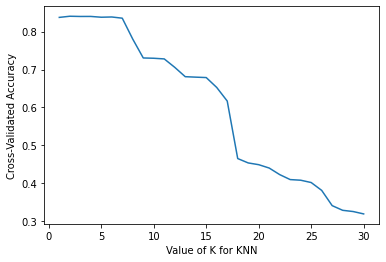

In [5]:
array = knnDF_user.values
X = array[:,0:2]
y = array[:,2]
k_range = range(1, 31)
k_scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())

plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

In [6]:
X_train, X_test, Y_train, Y_test= train_test_split(X, y, test_size=0.3,random_state=7)
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, Y_train)
# pickle.dump(knn, open('knn.sav', 'wb'))
joblib.dump(knn, 'knn.sav')
predictions = knn.predict(X_test)
print(accuracy_score(Y_test, predictions))
print(confusion_matrix(Y_test, predictions))
print(classification_report(Y_test, predictions))

0.824687800192123
[[1 0 2 ... 0 0 0]
 [0 2 0 ... 0 0 0]
 [0 0 3 ... 0 0 0]
 ...
 [0 0 0 ... 5 0 0]
 [0 0 0 ... 0 8 0]
 [0 0 0 ... 0 0 6]]
              precision    recall  f1-score   support

           2       1.00      0.33      0.50         3
           5       0.33      0.50      0.40         4
           6       0.33      0.75      0.46         4
           7       1.00      0.40      0.57         5
           8       0.00      0.00      0.00         1
           9       1.00      1.00      1.00        79
          11       0.83      0.97      0.90        71
          12       0.94      0.81      0.87        78
          13       1.00      0.83      0.91         6
          14       1.00      0.42      0.59        12
          15       0.54      0.70      0.61        10
          16       0.67      1.00      0.80         2
          18       0.50      1.00      0.67         3
          19       1.00      0.67      0.80         3
          20       0.60      1.00      0.75        

D:\My Projects\Skincare Recommendation\venv\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\My Projects\Skincare Recommendation\venv\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\My Projects\Skincare Recommendation\venv\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\My 

In [60]:
new_val = [[110, 5]]
print(new_val)
predictions = knn.predict(new_val)
print(predictions.tolist())

[[110, 5]]
[88]


### 2.2 Decision Trees

In [ ]:
# define dataset
X, y = splitdataset(user_reviewsDF, 2)
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    # evaluate the model
    scores = evaluate_model(model, X, y)
    # store the results
    results.append(scores)
    names.append(name)
    # summarize the performance along the way
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))

In [ ]:
# plot model performance for comparison
plt.boxplot(results, labels=names, showmeans=True)
plt.show()

In [18]:
X, Y = splitdataset(user_reviewsDF, 5)
CV_Gini_Prune()

Decision Trees using Gini Index:
0.09005763688760807
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
              precision    recall  f1-score   support

           2       0.00      0.00      0.00         2
           5       0.00      0.00      0.00         5
           6       0.00      0.00      0.00         2
           7       0.00      0.00      0.00         1
           9       0.00      0.00      0.00        23
          11       0.00      0.00      0.00        18
          12       0.19      1.00      0.32        17
          13       0.00      0.00      0.00         4
          15       0.00      0.00      0.00         2
          16       0.00      0.00      0.00         2
          18       0.00      0.00      0.00         1
          19       0.00      0.00      0.00         2
          20       0.00      0.00      0.00         1
          23       0.00      0.00      0.00         2
          24    

D:\My Projects\Skincare Recommendation\venv\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\My Projects\Skincare Recommendation\venv\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\My Projects\Skincare Recommendation\venv\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result)

              precision    recall  f1-score   support

           2       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         3
           7       0.00      0.00      0.00         3
           8       0.00      0.00      0.00         1
           9       0.00      0.00      0.00        21
          11       0.16      1.00      0.27        18
          12       0.00      0.00      0.00        30
          14       0.00      0.00      0.00         1
          15       0.00      0.00      0.00         4
          16       0.00      0.00      0.00         1
          18       0.00      0.00      0.00         2
          19       0.00      0.00      0.00         1
          23       0.00      0.00      0.00         2
          24       0.00      0.00      0.00         1
          26       0.00      0.00      0.00         7
          27       0.00      0.00      0.00         3
          29       0.00      0.00      0.00        19
          32       0.33    

D:\My Projects\Skincare Recommendation\venv\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\My Projects\Skincare Recommendation\venv\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\My Projects\Skincare Recommendation\venv\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result)

              precision    recall  f1-score   support

           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         3
           7       0.00      0.00      0.00         2
           8       0.00      0.00      0.00         2
           9       0.00      0.00      0.00        28
          11       0.00      0.00      0.00        31
          12       0.21      1.00      0.35        22
          13       0.00      0.00      0.00         2
          14       0.00      0.00      0.00         4
          15       0.00      0.00      0.00         1
          18       0.00      0.00      0.00         3
          19       0.00      0.00      0.00         2
          23       0.00      0.00      0.00         1
          26       0.00      0.00      0.00         3
          27       0.00      0.00      0.00         1
          29       0.00      0.00      0.00        27
          32       0.41      1.00      0.58        42
          35       0.00    

0.09077809798270893
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
              precision    recall  f1-score   support

           2       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         2
           6       0.00      0.00      0.00         4
           7       0.00      0.00      0.00         2
           9       0.00      0.00      0.00        21
          11       0.00      0.00      0.00        32
          12       0.18      1.00      0.30        19
          13       0.00      0.00      0.00         4
          14       0.00      0.00      0.00         1
          15       0.00      0.00      0.00         2
          16       0.00      0.00      0.00         1
          18       0.00      0.00      0.00         1
          19       0.00      0.00      0.00         1
          20       0.00      0.00      0.00         2
          24       0.00      0.00      0.00      

D:\My Projects\Skincare Recommendation\venv\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\My Projects\Skincare Recommendation\venv\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\My Projects\Skincare Recommendation\venv\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
              precision    recall  f1-score   support

           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         2
           7       0.00      0.00      0.00         2
           8       0.00      0.00      0.00         1
           9       0.00      0.00      0.00        26
          11       0.00      0.00      0.00        22
          12       0.00      0.00      0.00        22
          14       0.00      0.00      0.00         2
          15       0.00      0.00      0.00         1
          16       0.00      0.00      0.00         4
          18       0.00      0.00      0.00         4
          19       0.00      0.00      0.00         5
          20       0.00      0.00      0.00         4
          23       0.00      0.00      0.00         1
          26       0.00      0.00      0.00         2
          27   

D:\My Projects\Skincare Recommendation\venv\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\My Projects\Skincare Recommendation\venv\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\My Projects\Skincare Recommendation\venv\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result)

              precision    recall  f1-score   support

           2       0.00      0.00      0.00         2
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         1
           9       0.00      0.00      0.00        29
          11       0.22      1.00      0.36        21
          12       0.00      0.00      0.00        21
          13       0.00      0.00      0.00         1
          14       0.00      0.00      0.00         3
          15       0.00      0.00      0.00         1
          16       0.00      0.00      0.00         2
          18       0.00      0.00      0.00         2
          19       0.00      0.00      0.00         1
          20       0.00      0.00      0.00         1
          23       0.00      0.00      0.00         1
          24       0.00      0.00      0.00         2
          26       0.00      0.00      0.00         1
          29       0.00      0.00      0.00        26
          32       0.44    

D:\My Projects\Skincare Recommendation\venv\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\My Projects\Skincare Recommendation\venv\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\My Projects\Skincare Recommendation\venv\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\My 

              precision    recall  f1-score   support

           2       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         5
           7       0.00      0.00      0.00         2
           9       0.00      0.00      0.00        34
          11       0.00      0.00      0.00        25
          12       0.21      1.00      0.35        22
          13       0.00      0.00      0.00         3
          15       0.00      0.00      0.00         2
          16       0.00      0.00      0.00         1
          18       0.00      0.00      0.00         1
          19       0.00      0.00      0.00         1
          20       0.00      0.00      0.00         3
          24       0.00      0.00      0.00         2
          26       0.00      0.00      0.00         3
          27       0.00      0.00      0.00         1
          29       0.00      0.00      0.00        26
          32       0.32    

D:\My Projects\Skincare Recommendation\venv\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\My Projects\Skincare Recommendation\venv\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\My Projects\Skincare Recommendation\venv\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result)

              precision    recall  f1-score   support

           2       0.00      0.00      0.00         2
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         4
           7       0.00      0.00      0.00         2
           9       0.00      0.00      0.00        24
          11       0.00      0.00      0.00        23
          12       0.18      1.00      0.31        16
          14       0.00      0.00      0.00         1
          15       0.00      0.00      0.00         5
          16       0.00      0.00      0.00         2
          18       0.00      0.00      0.00         1
          20       0.00      0.00      0.00         2
          23       0.00      0.00      0.00         1
          24       0.00      0.00      0.00         2
          26       0.00      0.00      0.00         2
          29       0.00      0.00      0.00        24
          32       0.42      1.00      0.59        39
          33       0.00    

D:\My Projects\Skincare Recommendation\venv\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\My Projects\Skincare Recommendation\venv\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\My Projects\Skincare Recommendation\venv\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result)

              precision    recall  f1-score   support

           5       0.00      0.00      0.00         2
           6       0.00      0.00      0.00         2
           7       0.00      0.00      0.00         5
           8       0.00      0.00      0.00         1
           9       0.00      0.00      0.00        23
          11       0.00      0.00      0.00        24
          12       0.00      0.00      0.00        28
          13       0.00      0.00      0.00         2
          14       0.00      0.00      0.00         2
          15       0.00      0.00      0.00         3
          16       0.00      0.00      0.00         1
          18       0.00      0.00      0.00         2
          19       0.00      0.00      0.00         1
          20       0.00      0.00      0.00         1
          23       0.00      0.00      0.00         2
          24       0.00      0.00      0.00         2
          26       0.00      0.00      0.00         1
          27       0.00    

D:\My Projects\Skincare Recommendation\venv\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\My Projects\Skincare Recommendation\venv\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\My Projects\Skincare Recommendation\venv\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\My 

              precision    recall  f1-score   support

           2       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         2
           7       0.00      0.00      0.00         1
           8       0.00      0.00      0.00         2
           9       0.00      0.00      0.00        27
          11       0.15      1.00      0.26        15
          12       0.00      0.00      0.00        28
          13       0.00      0.00      0.00         3
          15       0.00      0.00      0.00         2
          16       0.00      0.00      0.00         1
          18       0.00      0.00      0.00         1
          19       0.00      0.00      0.00         2
          23       0.00      0.00      0.00         1
          24       0.00      0.00      0.00         1
          26       0.00      0.00      0.00         5
          27       0.00      0.00      0.00         1
          29       0.00      0.00      0.00        28
          32       0.38    

D:\My Projects\Skincare Recommendation\venv\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\My Projects\Skincare Recommendation\venv\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\My Projects\Skincare Recommendation\venv\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
              precision    recall  f1-score   support

           2       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         2
           7       0.00      0.00      0.00         1
           8       0.00      0.00      0.00         1
           9       0.00      0.00      0.00        27
          11       0.20      1.00      0.33        18
          12       0.00      0.00      0.00        28
          13       0.00      0.00      0.00         4
          15       0.00      0.00      0.00         3
          18       0.00      0.00      0.00         2
          19       0.00      0.00      0.00         2
          26       0.00      0.00      0.00         2
          27       0.00      0.00      0.00         1
          29       0.00      0.00      0.00        23
          32   

D:\My Projects\Skincare Recommendation\venv\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\My Projects\Skincare Recommendation\venv\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\My Projects\Skincare Recommendation\venv\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result)


[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
              precision    recall  f1-score   support

           2       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         3
           6       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         2
           8       0.00      0.00      0.00         1
           9       0.00      0.00      0.00        24
          11       0.00      0.00      0.00        28
          12       0.17      1.00      0.28        17
          13       0.00      0.00      0.00         1
          14       0.00      0.00      0.00         4
          15       0.00      0.00      0.00         5
          16       0.00      0.00      0.00         1
          18       0.00      0.00      0.00         2
          20       0.00      0.00      0.00         3
          23       0.00      0.00      0.00         1
          29  

D:\My Projects\Skincare Recommendation\venv\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\My Projects\Skincare Recommendation\venv\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\My Projects\Skincare Recommendation\venv\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\My 

              precision    recall  f1-score   support

           2       0.00      0.00      0.00         2
           5       0.00      0.00      0.00         3
           6       0.00      0.00      0.00         3
           7       0.00      0.00      0.00         1
           9       0.00      0.00      0.00        22
          11       0.00      0.00      0.00        22
          12       0.22      1.00      0.37        20
          13       0.00      0.00      0.00         4
          14       0.00      0.00      0.00         1
          15       0.00      0.00      0.00         2
          16       0.00      0.00      0.00         4
          18       0.00      0.00      0.00         1
          19       0.00      0.00      0.00         1
          20       0.00      0.00      0.00         1
          23       0.00      0.00      0.00         1
          26       0.00      0.00      0.00         2
          27       0.00      0.00      0.00         2
          29       0.00    

D:\My Projects\Skincare Recommendation\venv\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\My Projects\Skincare Recommendation\venv\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\My Projects\Skincare Recommendation\venv\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result)

              precision    recall  f1-score   support

           2       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         4
           9       0.00      0.00      0.00        20
          11       0.19      1.00      0.32        20
          12       0.00      0.00      0.00        23
          13       0.00      0.00      0.00         2
          14       0.00      0.00      0.00         2
          15       0.00      0.00      0.00         3
          18       0.00      0.00      0.00         3
          19       0.00      0.00      0.00         1
          20       0.00      0.00      0.00         1
          24       0.00      0.00      0.00         1
          26       0.00      0.00      0.00         3
          27       0.00      0.00      0.00         1
          29       0.00      0.00      0.00        25
          32       0.44      1.00      0.61        45
          33       0.00    

D:\My Projects\Skincare Recommendation\venv\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\My Projects\Skincare Recommendation\venv\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\My Projects\Skincare Recommendation\venv\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\My 

              precision    recall  f1-score   support

           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         2
           7       0.00      0.00      0.00         1
           9       0.00      0.00      0.00        23
          11       0.21      1.00      0.35        22
          12       0.00      0.00      0.00        28
          13       0.00      0.00      0.00         6
          14       0.00      0.00      0.00         1
          15       0.00      0.00      0.00         5
          16       0.00      0.00      0.00         1
          18       0.00      0.00      0.00         1
          19       0.00      0.00      0.00         2
          20       0.00      0.00      0.00         4
          24       0.00      0.00      0.00         1
          26       0.00      0.00      0.00         3
          29       0.00      0.00      0.00        24
          32       0.37      1.00      0.54        39
          33       0.00    

D:\My Projects\Skincare Recommendation\venv\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\My Projects\Skincare Recommendation\venv\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\My Projects\Skincare Recommendation\venv\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\My 


[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
              precision    recall  f1-score   support

           2       0.00      0.00      0.00         3
           5       0.00      0.00      0.00         2
           6       0.00      0.00      0.00         3
           8       0.00      0.00      0.00         1
           9       0.00      0.00      0.00        22
          11       0.00      0.00      0.00        24
          12       0.23      1.00      0.37        22
          13       0.00      0.00      0.00         3
          14       0.00      0.00      0.00         3
          15       0.00      0.00      0.00         2
          16       0.00      0.00      0.00         1
          18       0.00      0.00      0.00         2
          19       0.00      0.00      0.00         2
          20       0.00      0.00      0.00         1
          23       0.00      0.00      0.00         1
          27  

D:\My Projects\Skincare Recommendation\venv\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\My Projects\Skincare Recommendation\venv\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\My Projects\Skincare Recommendation\venv\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\My 


[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
              precision    recall  f1-score   support

           2       0.00      0.00      0.00         3
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         2
           7       0.00      0.00      0.00         3
           8       0.00      0.00      0.00         2
           9       0.00      0.00      0.00        21
          11       0.21      1.00      0.35        18
          12       0.00      0.00      0.00        22
          13       0.00      0.00      0.00         3
          15       0.00      0.00      0.00         4
          16       0.00      0.00      0.00         1
          18       0.00      0.00      0.00         3
          19       0.00      0.00      0.00         2
          20       0.00      0.00      0.00         1
          23       0.00      0.00      0.00         1
          24  

D:\My Projects\Skincare Recommendation\venv\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\My Projects\Skincare Recommendation\venv\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\My Projects\Skincare Recommendation\venv\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result)


[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
              precision    recall  f1-score   support

           5       0.00      0.00      0.00         3
           6       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         3
           9       0.00      0.00      0.00        23
          11       0.00      0.00      0.00        24
          12       0.00      0.00      0.00        26
          13       0.00      0.00      0.00         1
          14       0.00      0.00      0.00         2
          16       0.00      0.00      0.00         2
          18       0.00      0.00      0.00         3
          19       0.00      0.00      0.00         2
          20       0.00      0.00      0.00         2
          23       0.00      0.00      0.00         1
          26       0.00      0.00      0.00         2
          27       0.00      0.00      0.00         2
          29  

D:\My Projects\Skincare Recommendation\venv\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\My Projects\Skincare Recommendation\venv\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\My Projects\Skincare Recommendation\venv\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result)


[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
              precision    recall  f1-score   support

           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         2
           7       0.00      0.00      0.00         2
           9       0.00      0.00      0.00        20
          11       0.20      1.00      0.33        20
          12       0.00      0.00      0.00        20
          13       0.00      0.00      0.00         2
          14       0.00      0.00      0.00         6
          15       0.00      0.00      0.00         2
          18       0.00      0.00      0.00         3
          20       0.00      0.00      0.00         2
          26       0.00      0.00      0.00         3
          27       0.00      0.00      0.00         1
          29       0.00      0.00      0.00        28
          32       0.36      1.00      0.53        30
          33  

D:\My Projects\Skincare Recommendation\venv\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\My Projects\Skincare Recommendation\venv\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\My Projects\Skincare Recommendation\venv\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
              precision    recall  f1-score   support

           2       0.00      0.00      0.00         2
           5       0.00      0.00      0.00         5
           6       0.00      0.00      0.00         2
           7       0.00      0.00      0.00         1
           8       0.00      0.00      0.00         2
           9       0.00      0.00      0.00        18
          11       0.00      0.00      0.00        34
          12       0.00      0.00      0.00        27
          13       0.00      0.00      0.00         2
          14       0.00      0.00      0.00         3
          15       0.00      0.00      0.00         3
          16       0.00      0.00      0.00         2
          18       0.00      0.00      0.00         1
          19       0.00      0.00      0.00         1
          20       0.00      0.00      0.00         1
          23   

D:\My Projects\Skincare Recommendation\venv\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\My Projects\Skincare Recommendation\venv\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\My Projects\Skincare Recommendation\venv\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result)

              precision    recall  f1-score   support

           5       0.00      0.00      0.00         2
           6       0.00      0.00      0.00         2
           7       0.00      0.00      0.00         1
           9       0.00      0.00      0.00        21
          11       0.00      0.00      0.00        27
          12       0.00      0.00      0.00        25
          13       0.00      0.00      0.00         1
          14       0.00      0.00      0.00         2
          15       0.00      0.00      0.00         2
          18       0.00      0.00      0.00         2
          19       0.00      0.00      0.00         1
          20       0.00      0.00      0.00         2
          24       0.00      0.00      0.00         3
          26       0.00      0.00      0.00         1
          27       0.00      0.00      0.00         2
          29       0.00      0.00      0.00        27
          32       0.43      1.00      0.60        46
          33       0.00    

D:\My Projects\Skincare Recommendation\venv\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\My Projects\Skincare Recommendation\venv\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\My Projects\Skincare Recommendation\venv\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\My Projects

              precision    recall  f1-score   support

           2       0.00      0.00      0.00         2
           5       0.00      0.00      0.00         2
           6       0.00      0.00      0.00         2
           7       0.00      0.00      0.00         1
           8       0.00      0.00      0.00         2
           9       0.00      0.00      0.00        21
          11       0.00      0.00      0.00        26
          12       0.23      1.00      0.37        22
          13       0.00      0.00      0.00         1
          14       0.00      0.00      0.00         2
          15       0.00      0.00      0.00         4
          18       0.00      0.00      0.00         2
          19       0.00      0.00      0.00         1
          23       0.00      0.00      0.00         2
          24       0.00      0.00      0.00         1
          26       0.00      0.00      0.00         2
          29       0.00      0.00      0.00        32
          32       0.38    

D:\My Projects\Skincare Recommendation\venv\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\My Projects\Skincare Recommendation\venv\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\My Projects\Skincare Recommendation\venv\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\My 


[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
              precision    recall  f1-score   support

           2       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         2
           6       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         2
           8       0.00      0.00      0.00         1
           9       0.03      1.00      0.06        18
          11       0.21      1.00      0.34        23
          12       0.00      0.00      0.00        28
          13       0.00      0.00      0.00         2
          14       0.00      0.00      0.00         3
          15       0.00      0.00      0.00         5
          16       0.00      0.00      0.00         2
          18       0.00      0.00      0.00         1
          19       0.00      0.00      0.00         1
          23       0.00      0.00      0.00         1
          24  

D:\My Projects\Skincare Recommendation\venv\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\My Projects\Skincare Recommendation\venv\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\My Projects\Skincare Recommendation\venv\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\My 


[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
              precision    recall  f1-score   support

           5       0.00      0.00      0.00         3
           6       0.00      0.00      0.00         5
           7       0.00      0.00      0.00         1
           8       0.00      0.00      0.00         1
           9       0.00      0.00      0.00        34
          11       0.00      0.00      0.00        22
          12       0.00      0.00      0.00        27
          13       0.00      0.00      0.00         1
          14       0.00      0.00      0.00         4
          15       0.00      0.00      0.00         6
          16       0.00      0.00      0.00         3
          18       0.00      0.00      0.00         2
          19       0.00      0.00      0.00         3
          20       0.00      0.00      0.00         2
          26       0.00      0.00      0.00         3
          27  

 [0 0 0 ... 0 0 0]]
              precision    recall  f1-score   support

           2       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         3
           6       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         1
           8       0.00      0.00      0.00         2
           9       0.00      0.00      0.00        21
          11       0.24      1.00      0.39        25
          12       0.00      0.00      0.00        25
          13       0.00      0.00      0.00         1
          15       0.00      0.00      0.00         2
          16       0.00      0.00      0.00         2
          19       0.00      0.00      0.00         1
          20       0.00      0.00      0.00         4
          23       0.00      0.00      0.00         3
          24       0.00      0.00      0.00         1
          26       0.00      0.00      0.00         2
          29       0.00      0.00      0.00        21
       

D:\My Projects\Skincare Recommendation\venv\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\My Projects\Skincare Recommendation\venv\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\My Projects\Skincare Recommendation\venv\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result)

### 2.2 Item-Item Collaborative Filtering using Correlation

In [ ]:
star_matrix = user_reviews_sliced.groupby(['user_id', 'product_id'])['stars'].sum().unstack().reset_index().fillna(0).set_index('user_id')
star_matrix

In [ ]:
drop_list = []
for i in star_matrix.index:
    total_ratings = sum([1 for i in star_matrix.loc[i] if i != 0.0])
    if total_ratings < 2:
        drop_list.append(i)
star_matrix.drop(index = drop_list, inplace = True)
star_matrix

In [ ]:
item_specific = star_matrix[424]
item_specific

In [ ]:
similar_rating = star_matrix.corrwith(item_specific)
star_series = pd.DataFrame(similar_rating[similar_rating > 0][1:])
star_series.reset_index(inplace=True)
star_list = []
star_list.append(star_series['product_id'][0])
star_list.append(star_series['product_id'][1])
star_list

### 2.3 Item-Item Collaborative Filtering using KNN

In [ ]:
# star_matrix_pivoted = user_reviews_sliced.groupby(['product_id', 'user_id'])['stars'].sum().unstack().reset_index().fillna(0).set_index('product_id')
# product_to_idx = {
#     i: product_id for i, product_id in 
#     enumerate(list(productsDF.loc[star_matrix_pivoted.index].product_id))
# }
# user_sparse_matrix = csr_matrix(star_matrix_pivoted.values)
# user_sparse_matrix

In [ ]:
# model_knn = NearestNeighbors(metric='cosine', algorithm='brute', n_neighbors=5, n_jobs=-1)
# model_knn.fit(user_sparse_matrix)

In [ ]:
# def fuzzy_matching(mapper, fav_movie, verbose=True):
#     match_tuple = []
#     for product_name, product_id in mapper.items():
#         ratio = fuzz.ratio(product_name.lower(), fav_movie.lower())
#         if ratio >= 60:
#             match_tuple.append((product_name, product_name, ratio))
#     match_tuple = sorted(match_tuple, key=lambda x: x[2])[::-1]
#     if not match_tuple:
#         print('No match is found')
#         return
#     if verbose:
#         print('Possible match: {0}\n'.format([x[0] for x in match_tuple]))
#     return match_tuple[0][1]

In [ ]:
# def make_recommendation(model_knn, data, mapper, fav_movie, n_recommendations):
    
#     # fit
#     model_knn.fit(data)
#     # get input movie index
#     print('You have input:', fav_movie)
#     idx = fuzzy_matching(mapper, fav_movie, verbose=True)
#     print(idx)
    
#     print('Recommendation system start to make inference')
#     print('......\n')
#     distances, indices = model_knn.kneighbors(data[list(idx)], n_neighbors=n_recommendations+1)
    
#     raw_recommends = \
#         sorted(list(zip(indices.squeeze().tolist(), distances.squeeze().tolist())), key=lambda x: x[1])[:0:-1]
#     # get reverse mapper
#     reverse_mapper = {v: k for k, v in data.items()}
#     # print recommendations
#     print('Recommendations for {}:'.format(fav_movie))
#     for i, (idx, dist) in enumerate(raw_recommends):
#         print('{0}: {1}, with distance of {2}'.format(i+1, reverse_mapper[idx], dist))

In [ ]:
# make_recommendation(model_knn=model_knn, data=user_sparse_matrix, mapper=product_to_idx, 
#                     fav_movie='Garnier Organic Argan Mist 150ml', n_recommendations=5)

### 2.4 SVD

In [ ]:
data = user_reviews_sliced[['user_id', 'product_id', 'stars']]
reader = Reader(line_format='user item rating', sep=',')
data = Dataset.load_from_df(data, reader=reader)

trainset, testset = tts(data, test_size=.2)

In [ ]:
svd = SVD()
svd.fit(trainset)

In [ ]:
predictions = svd.test(testset)
accuracy.rmse(predictions)
accuracy.mae(predictions)

### Vader Sentiment Analysis

In [36]:
def closest(lst, K):
    return lst[min(range(len(lst)), key = lambda i: abs(lst[i]-K))]

In [37]:
reviewScores_dataframe = productsDF['product_id']
user_reviews_score = user_reviews_sliced[['product_id','review']]
analyzer = SentimentIntensityAnalyzer()
compound_results = []
for review in user_reviews_sliced.review:
    vs = analyzer.polarity_scores(review)
    compound_results.append(vs['pos'])
user_reviews_score['scores'] = compound_results
user_reviews_score = user_reviews_score.groupby('product_id').sum()

for product in user_reviews_score.index:
    user_reviews_score['scores'][product] = user_reviews_score['scores'][product] / len(user_reviews_sliced[user_reviews_sliced.product_id == product])
    
user_reviews_score.to_excel('Review Scores.xlsx')

D:\My Projects\Skincare Recommendation\venv\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


In [83]:
vs = analyzer.polarity_scores('I use this as a setting spray, love the scent.')
print('Closest review matching product: {}'.format(
    user_reviews_score.index[user_reviews_score.scores == closest(user_reviews_score.scores.to_list(), vs['pos'])].item()))

Closest review matching product: 51
